# K-means Clustering
## Answer These Questions:
    1. Describe two techniques to select the right number of clusters when using K-Means.

    Elbow Method & Silhouette Analysis
    elbow methd = It involves plotting the within-cluster sum of squares against the number of clusters . The WCSS measures the compactness of the clusters and as the number of clusters increases the WCSS tends to decrease.
    silgoutte = it is another technique used to evaluate the quality of clustering by measuring how well each data point lies within its cluster. The silhouette score ranges from -1 to 1, where a high silhouette score indicates that the data point is well-clustered, while a low score suggests that the data point may be in the wrong cluster.

    2. Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?
    Clustering Algorithms that Scale to Large Datasets: K-Means & DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

    Clustering Algorithms that Look for Regions of High Density: OPTICS (Ordering Points To Identify the Clustering Structure) & Mean Shift & DENCLUE (DENsity-based CLUstEring)




## Hands-on Exercise

In this this exercise, you will implement the K-means algorithm and use it for image compression.

* You will start with a sample dataset that will help you gain an intuition of how the K-means algorithm works.
* After that, you wil use the K-means algorithm for image compression by reducing the number of colors that occur in an image to only those that are most common in that image.




In [294]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

<a name="1"></a>
## 1 - Implementing K-means

The K-means algorithm is a method to automatically cluster similar
data points together.

* Concretely, you are given a training set $\{x^{(1)}, ..., x^{(m)}\}$, and you want
to group the data into a few cohesive “clusters”.


* K-means is an iterative procedure that
     * Starts by guessing the initial centroids, and then
     * Refines this guess by
         * Repeatedly assigning examples to their closest centroids, and then
         * Recomputing the centroids based on the assignments.
         

* In pseudocode, the K-means algorithm is as follows:

    ``` python
    # Initialize centroids
    # K is the number of clusters
    centroids = kMeans_init_centroids(X, K)
    
    for iter in range(iterations):
        # Cluster assignment step:
        # Assign each data point to the closest centroid.
        # idx[i] corresponds to the index of the centroid
        # assigned to example i
        idx = find_closest_centroids(X, centroids)

        # Move centroid step:
        # Compute means based on centroid assignments
        centroids = compute_means(X, idx, K)
    ```


* The inner-loop of the algorithm repeatedly carries out two steps:
    * (i) Assigning each training example $x^{(i)}$ to its closest centroid, and
    * (ii) Recomputing the mean of each centroid using the points assigned to it.
    
    
* The $K$-means algorithm will always converge to some final set of means for the centroids.

* However, that the converged solution may not always be ideal and depends on the initial setting of the centroids.
    * Therefore, in practice the K-means algorithm is usually run a few times with different random initializations.
    * One way to choose between these different solutions from different random initializations is to choose the one with the lowest cost function value (distortion).

You will implement the two phases of the K-means algorithm separately
in the next sections.
* You will start by completing `find_closest_centroid` and then proceed to complete `compute_centroids`.

<a name="1.1"></a>
### 1.1 Finding closest centroids

In the “cluster assignment” phase of the K-means algorithm, the
algorithm assigns every training example $x^{(i)}$ to its closest
centroid, given the current positions of centroids.

<a name="ex01"></a>
### Exercise 1

Your task is to complete the code in `find_closest_centroids`.
* This function takes the data matrix `X` and the locations of all
centroids inside `centroids`
* It should output a one-dimensional array `idx` (which has the same number of elements as `X`) that holds the index  of the closest centroid (a value in $\{1,...,K\}$, where $K$ is total number of centroids) to every training example .
* Specifically, for every example $x^{(i)}$ we set
$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$
where
 * $c^{(i)}$ is the index of the centroid that is closest to $x^{(i)}$ (corresponds to `idx[i]` in the starter code), and
 * $\mu_j$ is the position (value) of the $j$’th centroid. (stored in `centroids` in the starter code)


In [298]:
def find_closest_centroids(X, centroids):
    """
    Find the closest centroid for each sample

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): k centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """

    m = X.shape[0]
    #  centroids number
    k = centroids.shape[0]
    # Array to store
    idx = np.zeros(m, dtype=int)
    for i in range(m):
        distances =np.linalg.norm(X[i] - centroids, axis=1)
        # Find  the closest centroid
        closest_centroid = np.argmin(distances)
        idx[i] =closest_centroid

    return idx

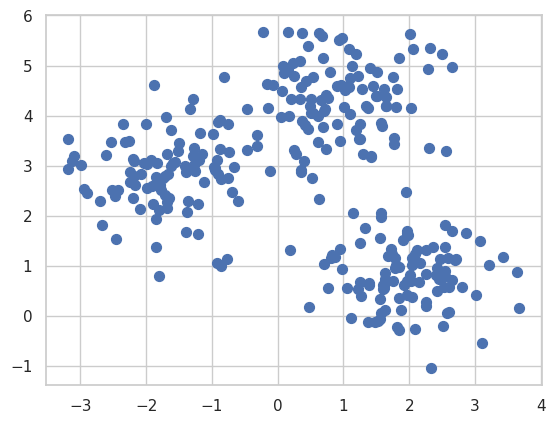

In [314]:
# Load an example dataset that we will be using
X, y_true = make_blobs(n_samples=300, centers=random.randint(3, 5),
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [315]:
# Select an initial set of centroids
# e.g. np.array([[3,3], [6,2], [8,5]])
initial_centroids =np.array([[3,3], [6,2], [8,5]])


# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

<a name="1.2"></a>
### 1.2 Computing centroid means

Given assignments of every point to a centroid, the second phase of the
algorithm recomputes, for each centroid, the mean of the points that
were assigned to it.


<a name="ex02"></a>
### Exercise 2

Please complete the `compute_centroids` below to recompute the value for each centroid

* Specifically, for every centroid $\mu_k$ we set
$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$

    where
    * $C_k$ is the set of examples that are assigned to centroid $k$
    * $|C_k|$ is the number of examples in the set $C_k$


* Concretely, if two examples say $x^{(3)}$ and $x^{(5)}$ are assigned to centroid $k=2$,
then you should update $\mu_2 = \frac{1}{2}(x^{(3)}+x^{(5)})$.

In [316]:
import numpy as np

def compute_centroids(X, idx, K):
 """  Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
 m, n= X.shape
 centroids = np.zeros((K, n))
 for i in range(K):
        assigned_points = X[idx == i]
        if len(assigned_points) > 0:
            centroids[i] =np.mean(assigned_points, axis=0)
 return centroids


In [317]:
K = initial_centroids.shape[0]# Number of clusters
centroids = compute_centroids(X, idx, K)
print("Centroids:\n", centroids)


Centroids:
 [[0.42186012 2.68560921]
 [0.         0.        ]
 [0.         0.        ]]


<a name="2"></a>
## 2 - K-means on a sample dataset

After you have completed the two functions (`find_closest_centroids`
and `compute_centroids`) above, the next step is to complete the
run_KMeans function below that will return the new centroids computed.


In [318]:
def run_kMeans(X, initial_centroids, max_iters=10):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example.

    Args:
        X (ndarray):             (m, n) Data points
        initial_centroids (ndarray): (K, n) Initial centroids
        max_iters (int):         number of iterations

    Returns:
        centroids (ndarray):     (K, n) New centroids computed
        idx (ndarray):           (m,) Array containing index of closest centroid for each example in X
    """

    centroids = initial_centroids
    K = initial_centroids.shape[0]

    for _ in range(max_iters):
      # Assign each data point to the closest centroid
        idx = find_closest_centroids(X, centroids)
        # Compute new centroids
        centroids = compute_centroids(X, idx, K)

    return centroids, idx


In [319]:
max_iters = 10 # Number of iterations
centroids, idx = run_kMeans(X, initial_centroids, max_iters)


<a name="3"></a>
## 3 - Random initialization

A good strategy for initializing the centroids is to select random examples from the
training set.

Complete the function below to do a random initialization.

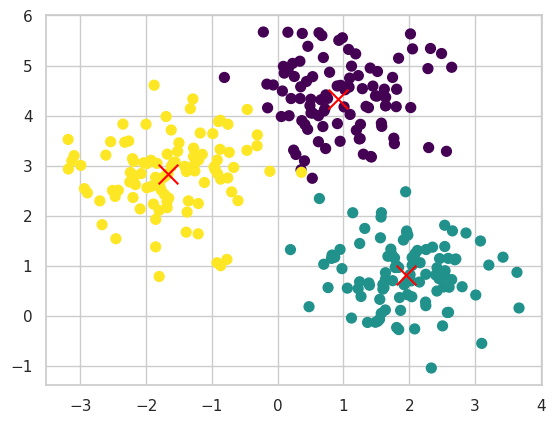

In [320]:
import numpy as np

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be
    used in K-Means on the dataset X

    Args:
        X (ndarray): Data points
        K (int):     number of centroids

    Returns:
        centroids (ndarray): Initialized centroids
    """
    m, n = X.shape
    # Randome shuffle
    random_indices = np.random.choice(m, K, replace=False)
    centroids = X[random_indices]

    return centroids

plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x')
plt.show()


<a name="4"></a>
## 4 - Image compression with K-means

In this exercise, you will apply K-means to image compression.

* In a straightforward 24-bit color representation of an image, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to different number of colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way.
* Specifically, you only need to store the RGB values of the selected colors, and for each pixel in the image you now need to only store the index of the color at that location.

In this part, you will use the K-means algorithm to select the K colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space.
* Once you have computed the cluster centroids on the image, you will then use the K colors to replace the pixels in the original image.

<a name="4.1"></a>
### 4.1 Dataset

**Load image**

First, you will get the image of some lovely penguins and then use `matplotlib` to read in the original image, as shown below.

In [246]:
original_img = plt.imread("/content/penguins.jpg")

**Check the dimensions and Visualize image**

You can get the shape of your image and visualize the image that was just loaded using the code below.

Shape of original_img is: (685, 685, 3)


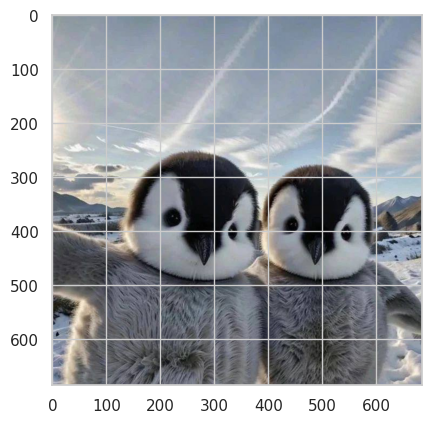

In [247]:
print("Shape of original_img is:", original_img.shape)
plt.imshow(original_img)

As you can see, this creates a three-dimensional matrix `original_img` where
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue.

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.


In [158]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img/255.0

# Reshape the image into an m x 3 matrix where m = number of pixels
X_img = np.reshape(original_img, (-1,3))

<a name="4.2"></a>
### 4.2 K-Means on image pixels

Now, run the cell below to run K-Means on the pre-processed image.

In [248]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K =4
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

<a name="4.3"></a>
### 4.3 Compress the image
After finding the top $K$ colors to represent the image, you can now
assign each pixel position to its closest centroid using the
`find_closest_centroids` function.
* This allows you to represent the original image using the centroid assignments of each pixel.
* Notice that you have significantly reduced the number of bits that are required to describe the image.

In [249]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

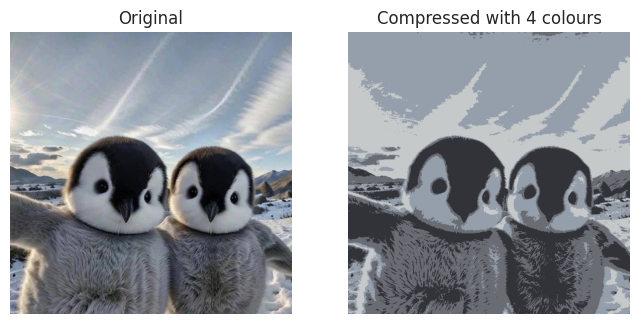

In [162]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow((original_img*255).astype(int))
ax[0].set_title('Original')
ax[0].set_axis_off()

# Display compressed image
ax[1].imshow((X_recovered*255).astype(int))
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

<a name="4"></a>
## 5 - Grouping mall customers using K-Means

In this exercise, you will apply K-means to group customers.

* Mall Customer data is an interesting dataset that has hypothetical customer data. It puts you in the shoes of the owner of a supermarket. You have customer data, and on this basis of the data, you have to divide the customers into various groups.

* The data includes the following features:

    1. Customer ID

    2. Customer Gender

    3. Customer Age

    4. Annual Income of the customer (in Thousand Dollars)

    5. Spending score of the customer (based on customer behaviour and spending nature)

<a name="4.1"></a>
### 5.1 Dataset

**Load dataset**

First, you need to read the customers' information from data sheet.

In [321]:
#Reading the excel file
data=pd.read_csv("/content/mallcustomers.csv")
data.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 5.2 Explore Data
So let us have a look at the data:

In [322]:
data.head()
data.corr()

<ipython-input-322-130270cc6b3d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerID,Age,Annual_Income_(k$),Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_(k$),0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


The data seems to be interesting. Let us look at the data distribution.

### 5.3 Data Distribution
#### Annual Income Distribution:

<ipython-input-286-ef2ebf36817b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual_Income_(k$)'])


Text(0, 0.5, 'Count')

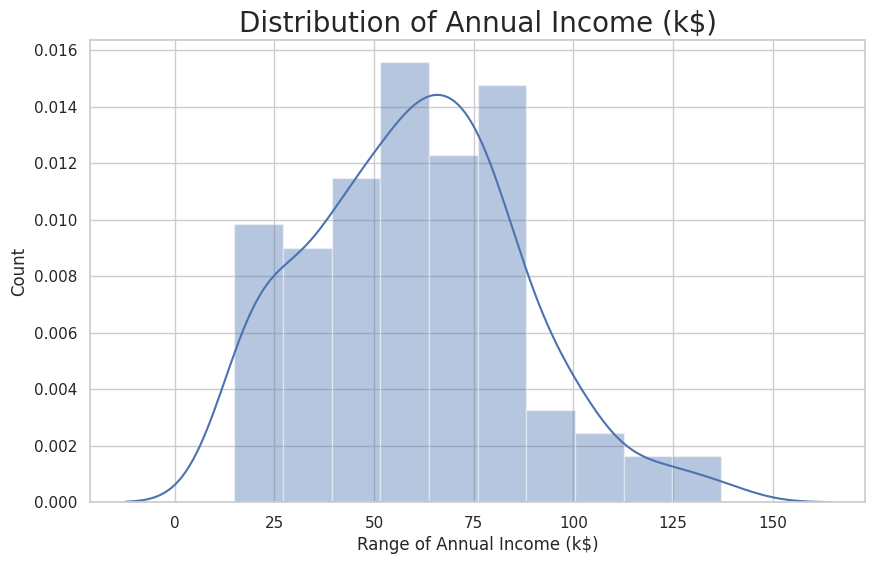

In [286]:
#Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Annual_Income_(k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

#### Check the Distribution of Age and Spending Score as well

<ipython-input-287-b861fc713aec>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], bins=30,  color='green')


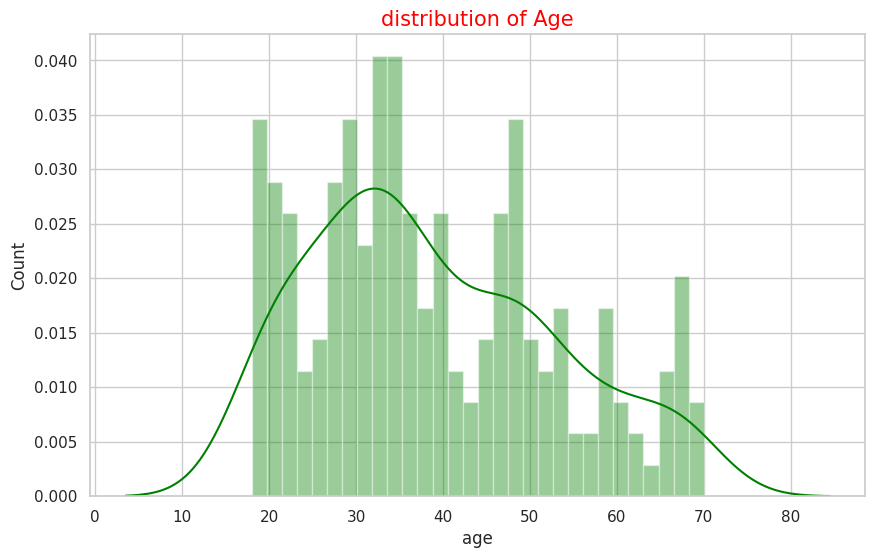

In [287]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], bins=30,  color='green')
plt.title('distribution of Age', fontsize = 15, color='red')
plt.xlabel('age')
plt.ylabel('Count')
plt.show()

<ipython-input-288-65b607c75f11>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending_Score'],bins=30,  color='deepPink')


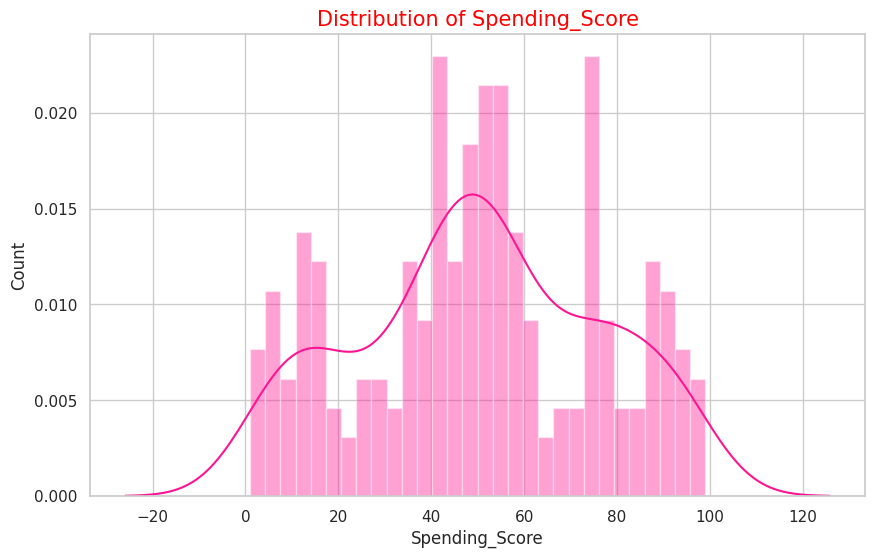

In [288]:
# Spending Score Distribution
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending_Score'],bins=30,  color='deepPink')
plt.title('Distribution of Spending_Score', fontsize = 15, color='red')
plt.xlabel('Spending_Score')
plt.ylabel('Count')
plt.show()

### Analyze the data and check whether male customers are more than female customers
You have to plot male customer count and female customer count in an appropriate way to show which one are the dominant one

<ipython-input-289-e3187c437087>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Gender'], color='blue')


0    112
1     88
Name: Gender, dtype: int64


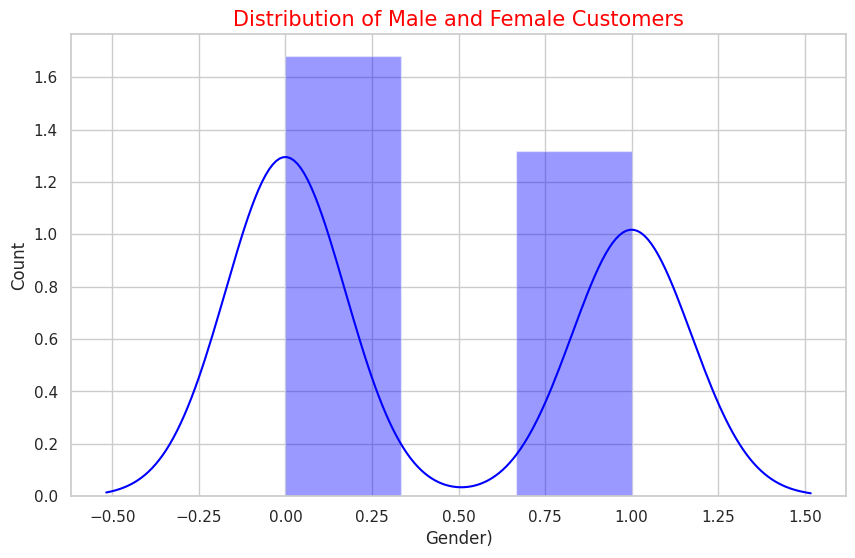

In [289]:
# plot customer count based on their gender here
import pandas as pd

plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
data['Gender']=pd.Categorical(data['Gender']).codes
sns.distplot(data['Gender'], color='blue')

plt.title('Distribution of Male and Female Customers', fontsize = 15, color='red')
plt.xlabel('Gender)')
plt.ylabel('Count')


gender_counts = data['Gender'].value_counts()
print(gender_counts)


### 4.4 Clustering based on 2 features
First, we work with two features only, annual income and spending score.

In [323]:
#We take just the Annual Income and Spending score
df1=data[["CustomerID","Gender","Age","Annual_Income_(k$)","Spending_Score"]]
X=df1[["Annual_Income_(k$)","Spending_Score"]]
#The input data
X.head()

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


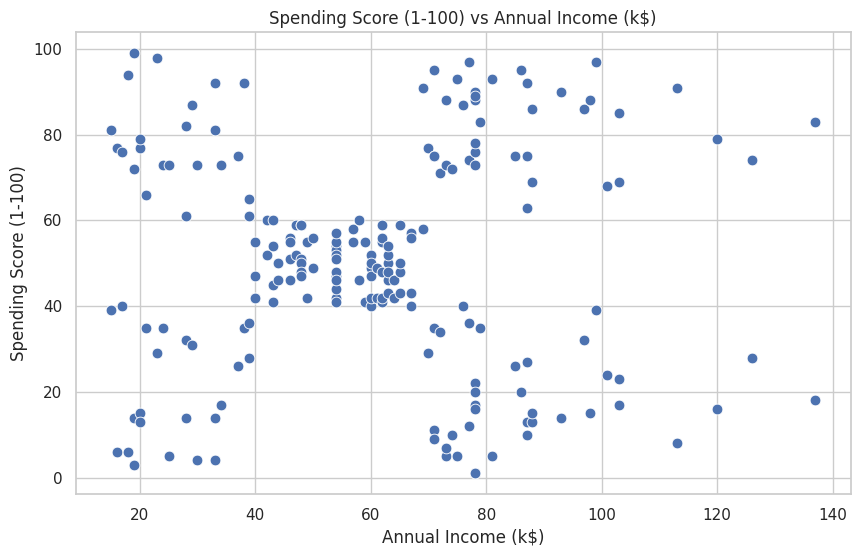

In [324]:
#Scatterplot of the input data
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual_Income_(k$)',y = 'Spending_Score',  data = X  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

### Finding the best K for clustering
In this section you have to run K-MEANS using different clusters (1-9) and then plot the inertia to find out the best K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


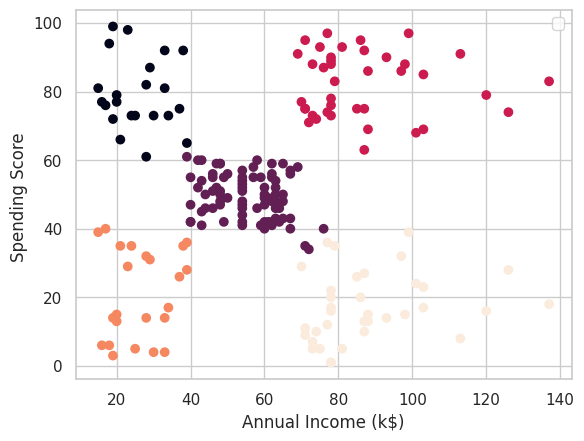

In [333]:
### run k-means using sklearn to find best K
import pandas as pd
from sklearn.cluster import KMeans
X2=X.to_numpy()
x=X2[:,0]
y=X2[:,1]
sample = list(zip(x, y))
kmeans = KMeans(n_clusters=5)
kmeans.fit(sample)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score ')
plt.legend()
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

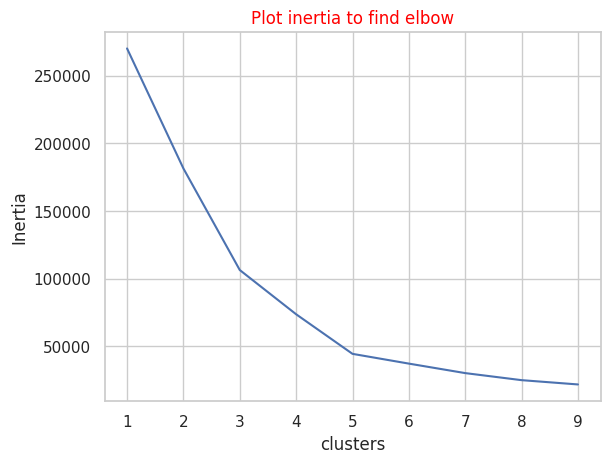

In [340]:
### Plot inertia to find elbow

cc=np.zeros((11,200));
inertias = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pl)
    inertias.append(kmeans.inertia_)
    cc[i]=kmeans.labels_
plt.plot(range(1,10), inertias)
plt.title('Plot inertia to find elbow', color='red')
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.show()

#### Now run K-MEANS with the found K to fit and predict labels
* Add labels to dataframe and show it

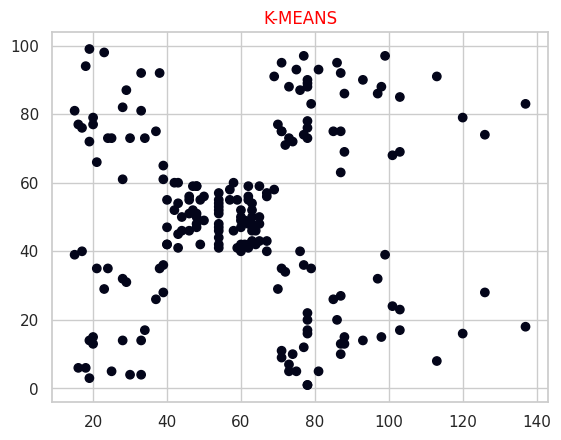

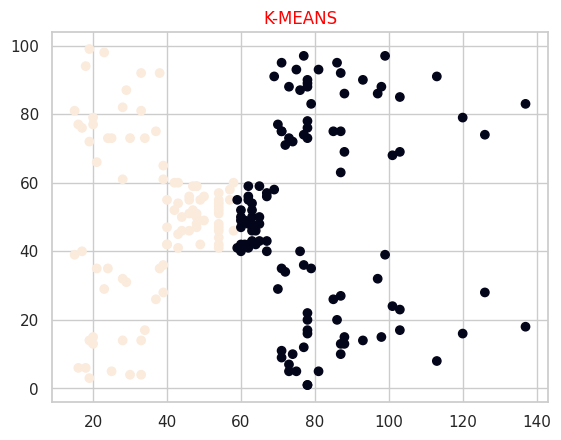

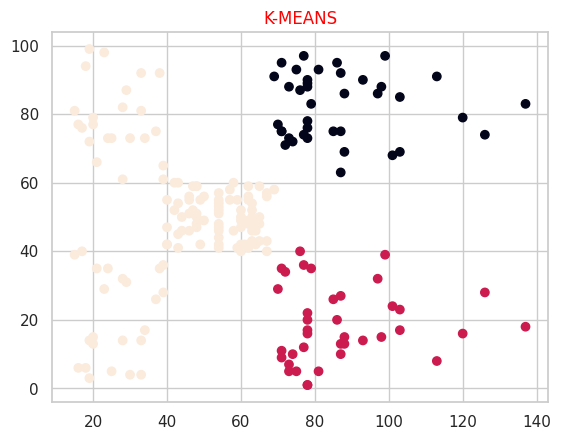

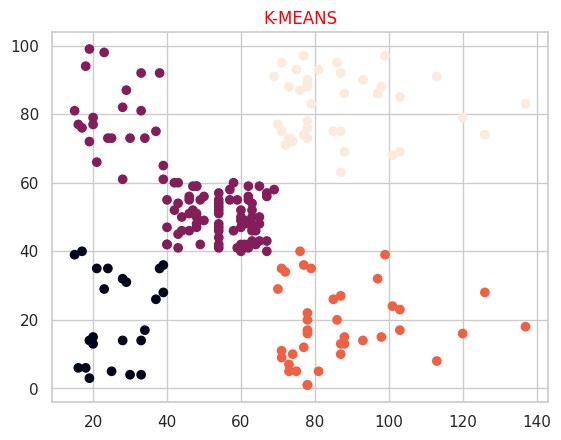

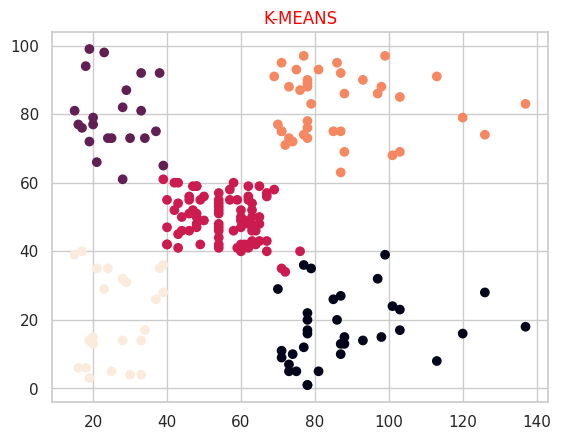

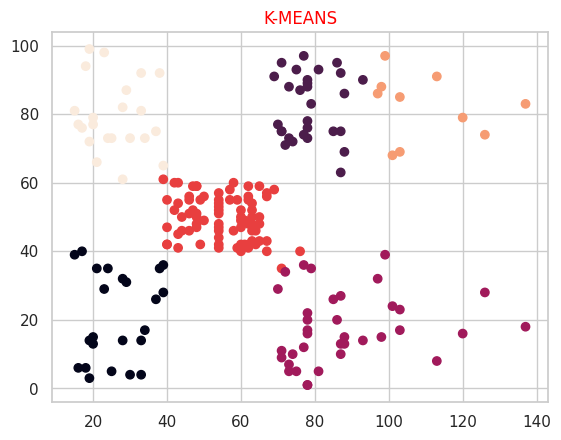

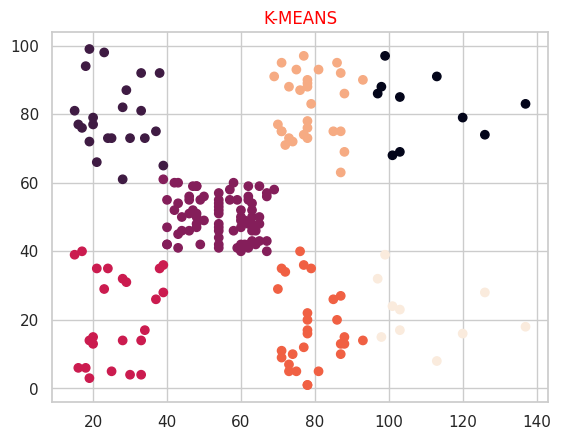

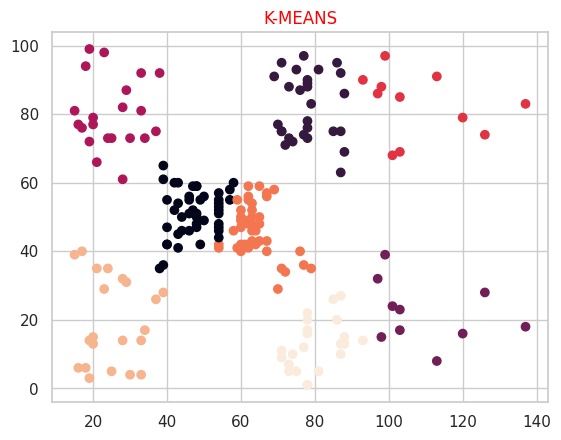

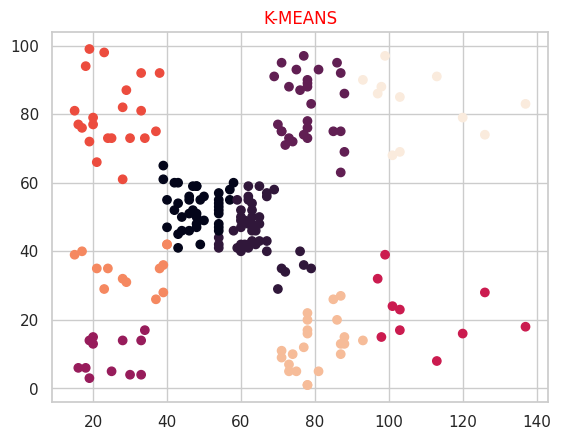

In [345]:
# run K-MEANS
for l in range(1,10):
  plt.scatter(x, y, c=cc[l])

  plt.title('K-MEANS', color='red')

  plt.show()